In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [3]:
filepath = r"zagros_SRTMGL3.tif"

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

In [19]:
# Projection
print(raster.GetProjection())

# Dimensions
print(str(raster.RasterXSize)+' points in x')
print(str(raster.RasterYSize)+' points in y')

# Number of bands
print(str(raster.RasterCount)+' bands')
print(raster.GetGeoTransform())
print('Geotransform is upper left long, delta lon, 0, upper left latitude, 0, delta latitude')
#For the question in the HW, note that the delta latitude is negative here.  What does this mean about our total latitude range?

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
2302 points in x
1324 points in y
1 bands
(52.94374999994707, 0.000833333333333144, 0.0, 28.201250000007224, 0.0, -0.000833333333333144)


In [34]:
(upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = raster.GetGeoTransform()
###Note that, like in the matlab case, these are "cell" registered, which means that the coordinate given here is the upper
###left corner of the upper left (northwest) cell.  We want the center of the cell.
upper_right_x = upper_left_x + x_size * (raster.RasterXSize+0.5)
lower_left_y  = upper_left_y + y_size * (raster.RasterYSize-0.5)

X = np.arange(upper_left_x+x_size/2,upper_right_x,x_size)
Y = np.arange(upper_left_y+y_size/2,lower_left_y,y_size)

minlon=np.min(X)
maxlon=np.max(X)
minlat=np.min(Y)
maxlat=np.max(Y)

In [35]:
# Read the raster band as variable
dem = raster.ReadAsArray()
print(np.shape(dem))


(1324, 2302)


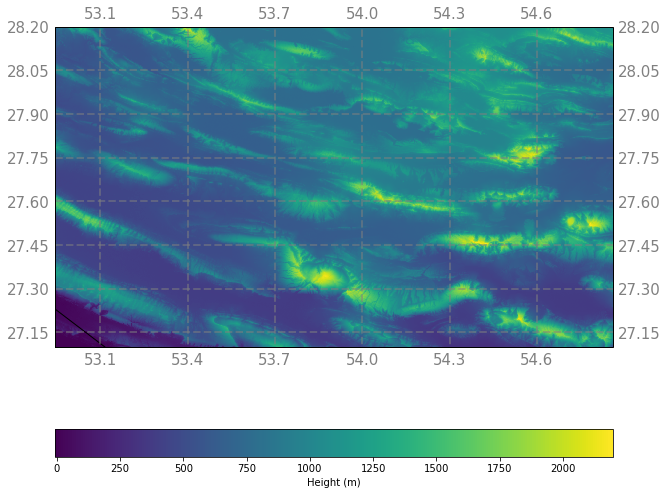

In [40]:
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minlon,maxlon,minlat,maxlat])
ax.coastlines()
im=ax.imshow(dem,origin='upper', transform=ccrs.PlateCarree(), extent=[minlon,maxlon,minlat,maxlat])



gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}
fig.colorbar(im,ax=ax,label='Height (m)',orientation='horizontal')
plt.show()